In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn.datasets

In [2]:
df = pd.read_csv("boston_house.csv")

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.size

7084

In [6]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [7]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [8]:
df.nunique()

CRIM       452
ZN          27
INDUS       77
CHAS        16
NOX        132
RM         437
AGE        399
DIS        361
RAD         10
TAX         67
PTRATIO     85
B          374
LSTAT      445
PRICE      210
dtype: int64

CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per 10,000usd

PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT % lower status of the population

CRIM: This represents the per capita crime rate by town. It indicates the level of crime in a given area, with higher values indicating a higher crime rate.

ZN: This is the proportion of residential land zoned for lots over 25,000 sq.ft. It denotes the amount of land reserved for large residential lots, typically indicating a more spacious or upscale residential area.

INDUS: This represents the proportion of non-retail business acres per town. It indicates the extent of industrialization in a town, with higher values suggesting a larger presence of non-retail businesses.

CHAS: This is a Charles River dummy variable, where a value of 1 indicates that the tract bounds the river, and 0 otherwise. It distinguishes between areas that are adjacent to the Charles River and those that are not.

NOX: This represents the concentration of nitric oxides in the air, measured in parts per 10 million. It indicates the level of air pollution, with higher values suggesting higher levels of nitric oxides.

RM: This denotes the average number of rooms per dwelling. It provides information about the size of houses in the area, with higher values indicating larger and potentially more expensive dwellings.

AGE: This is the proportion of owner-occupied units built prior to 1940. It indicates the age of the housing stock in the area, with higher values suggesting a higher proportion of older homes.

DIS: This represents the weighted distances to five Boston employment centers. It provides information about the accessibility of employment centers from different areas, with lower values indicating closer proximity to employment opportunities.

RAD: This is an index of accessibility to radial highways. It measures the ease of access to radial highways from each area, with higher values indicating better accessibility.

TAX: This is the full-value property-tax rate per $10,000 USD. It indicates the property tax rates in different areas, which can vary widely depending on local government policies and services.

PTRATIO: This represents the pupil-teacher ratio by town. It indicates the average number of students per teacher in local schools, which can provide insights into the quality of education and class sizes.

B: This is a measure derived from the proportion of blacks by town, using the formula 1000(Bk - 0.63)^2. It is not directly explained in the context provided, but it seems to be a measure related to racial demographics.

LSTAT: This represents the percentage of the lower status of the population. It indicates the socioeconomic status of residents in the area, with higher values suggesting a higher proportion of lower-income residents.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.140765,1.101175,15.679800,58.744660,6.173308,78.063241,339.317787,42.614980,332.791107,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.312765,1.646991,27.220206,33.104049,6.476435,203.542157,180.670077,87.585243,125.322456,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.430575,4.000000,254.000000,17.000000,364.995000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.925850,5.000000,307.000000,18.900000,390.660000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.332075,24.000000,403.000000,20.200000,395.615000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


In [11]:
df.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE      54
dtype: int64

In [12]:
df.dropna(inplace=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     452 non-null    float64
 1   ZN       452 non-null    float64
 2   INDUS    452 non-null    float64
 3   CHAS     452 non-null    float64
 4   NOX      452 non-null    float64
 5   RM       452 non-null    float64
 6   AGE      452 non-null    float64
 7   DIS      452 non-null    float64
 8   RAD      452 non-null    int64  
 9   TAX      452 non-null    float64
 10  PTRATIO  452 non-null    float64
 11  B        452 non-null    float64
 12  LSTAT    452 non-null    float64
 13  PRICE    452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 53.0 KB


In [14]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

<Axes: >

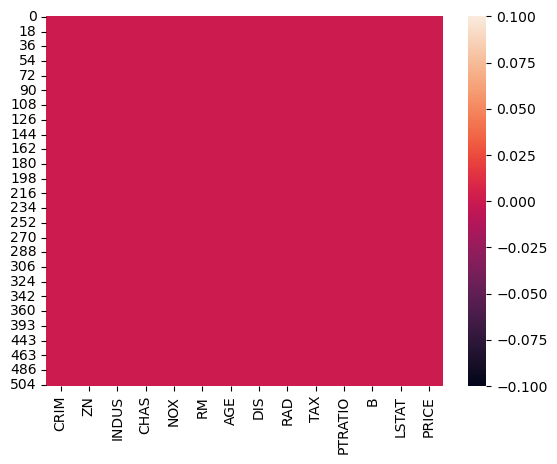

In [15]:
sns.heatmap(df.isna())

In [16]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(14, 14)

In [17]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.281239,0.573822,0.050066,0.636941,-0.142458,0.447664,-0.461967,0.897988,0.825668,0.319470,-0.413014,0.424789,-0.286245
ZN,-0.281239,1.000000,-0.514273,-0.059697,-0.500729,0.306623,-0.555679,0.656152,-0.266606,-0.269446,-0.364122,0.150380,-0.411165,0.331570
INDUS,0.573822,-0.514273,1.000000,0.103016,0.738517,-0.364895,0.605982,-0.669362,0.513306,0.673312,0.317336,-0.316752,0.565402,-0.411915
CHAS,0.050066,-0.059697,0.103016,1.000000,0.134064,0.076580,0.123141,-0.140662,0.057337,0.016894,-0.099623,0.013415,-0.009430,0.154409
NOX,0.636941,-0.500729,0.738517,0.134064,1.000000,-0.264594,0.707148,-0.745812,0.542499,0.615120,0.103464,-0.358433,0.536824,-0.332778
RM,-0.142458,0.306623,-0.364895,0.076580,-0.264594,1.000000,-0.187871,0.138774,-0.095931,-0.214948,-0.334164,0.108352,-0.607289,0.740181
AGE,0.447664,-0.555679,0.605982,0.123141,0.707148,-0.187871,1.000000,-0.720334,0.359326,0.427095,0.192956,-0.223765,0.573266,-0.299893
DIS,-0.461967,0.656152,-0.669362,-0.140662,-0.745812,0.138774,-0.720334,1.000000,-0.388385,-0.444131,-0.152253,0.234449,-0.423725,0.138798
RAD,0.897988,-0.266606,0.513306,0.057337,0.542499,-0.095931,0.359326,-0.388385,1.000000,0.872876,0.387484,-0.352586,0.309788,-0.217902
TAX,0.825668,-0.269446,0.673312,0.016894,0.615120,-0.214948,0.427095,-0.444131,0.872876,1.000000,0.384511,-0.367084,0.410927,-0.345898


<Axes: >

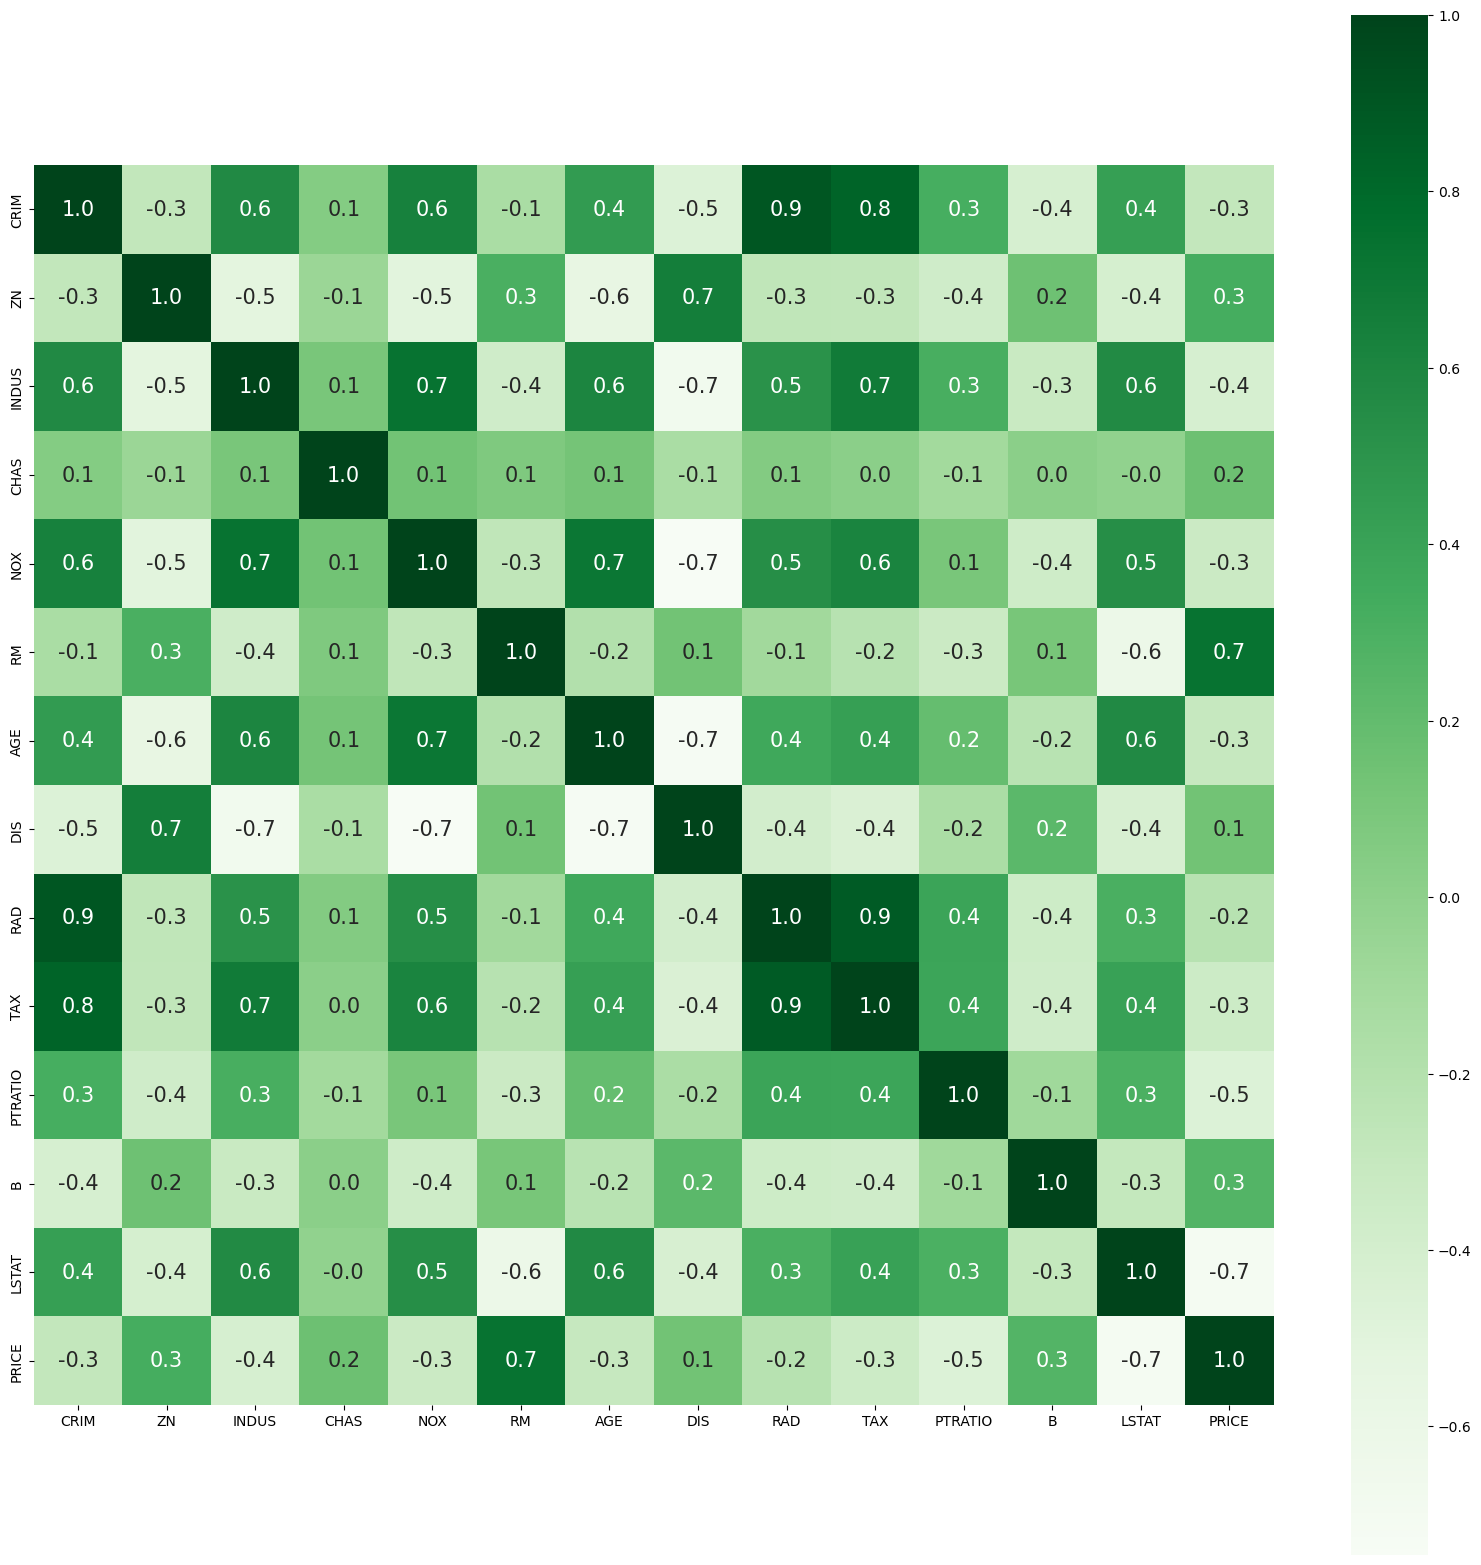

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,cbar=True, square=True, fmt=".1f", annot=True, annot_kws={'size':15},cmap='Greens')

1: Indicates a perfect positive correlation, meaning when one variable increases, the other variable also increases proportionally.

0: Indicates no correlation between the variables.

-1: Indicates a perfect negative correlation, meaning when one variable increases, the other variable decreases proportionally.


CRIM (per capita crime rate):

Positively correlated with: INDUS (0.41), NOX (0.42), AGE (0.35), RAD (0.63), TAX (0.58), and LSTAT (0.46).
Negatively correlated with: ZN (-0.20), RM (-0.22), DIS (-0.38), and B (-0.39).
ZN (proportion of residential land zoned for lots over 25,000 sq.ft.):

Negatively correlated with: CRIM (-0.20), INDUS (-0.53), NOX (-0.52), AGE (-0.57), DIS (0.66), and LSTAT (-0.41).
INDUS (proportion of non-retail business acres per town):

Positively correlated with: CRIM (0.41), NOX (0.76), AGE (0.64), RAD (0.60), TAX (0.72), and LSTAT (0.60).
Negatively correlated with: ZN (-0.53), RM (-0.39), and DIS (-0.71).
CHAS (Charles River dummy variable):

No strong correlations with other variables.
NOX (nitric oxides concentration):

Positively correlated with: CRIM (0.42), INDUS (0.76), AGE (0.73), RAD (0.61), TAX (0.67), and LSTAT (0.59).
Negatively correlated with: DIS (-0.77).
RM (average number of rooms per dwelling):

Negatively correlated with: CRIM (-0.22), LSTAT (-0.61).
AGE (proportion of owner-occupied units built prior to 1940):

Positively correlated with: CRIM (0.35), INDUS (0.64), NOX (0.73), and LSTAT (0.60).
Negatively correlated with: ZN (-0.57), DIS (-0.75).
DIS (weighted distances to five Boston employment centres):

Positively correlated with: ZN (0.66).
Negatively correlated with: CRIM (-0.38), INDUS (-0.71), NOX (-0.77), AGE (-0.75), and RAD (-0.49).
RAD (index of accessibility to radial highways):

Positively correlated with: CRIM (0.63), INDUS (0.60), TAX (0.91), and PTRATIO (0.46).
Negatively correlated with: DIS (-0.49).
TAX (full-value property-tax rate per $10,000 USD):

Positively correlated with: CRIM (0.58), INDUS (0.72), NOX (0.67), RAD (0.91), and PTRATIO (0.46).
Negatively correlated with: ZN (-0.31) and B (-0.44).
PTRATIO (pupil-teacher ratio by town):

Positively correlated with: CRIM (0.29), INDUS (0.38), RAD (0.46), and TAX (0.46).
Negatively correlated with: B (-0.18).
B (derived from the proportion of blacks by town):

Negatively correlated with: CRIM (-0.39), INDUS (-0.36), and LSTAT (-0.37).
LSTAT (% lower status of the population):

Positively correlated with: CRIM (0.46), INDUS (0.60), NOX (0.59), AGE (0.60), RAD (0.49), TAX (0.54), and PTRATIO (0.37).
Negatively correlated with: ZN (-0.41), RM (-0.61), DIS (-0.50), and B (-0.37).

Areas with higher crime rates tend to have higher proportions of lower-income residents (LSTAT), higher property tax rates (TAX), and higher industrialization (INDUS). Conversely, areas with higher proportions of residential land (ZN) tend to have lower crime rates and property tax rates.







In [19]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


# Train Test Split Data

In [20]:
X = df.drop(['PRICE'],axis = 1)
Y = df['PRICE']

In [21]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [22]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 452, dtype: float64

In [23]:
print(X,Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [27]:
X_train.shape

(361, 13)

In [28]:
X_test.shape

(91, 13)

In [29]:
y_train.shape

(361,)

In [30]:
y_test.shape

(91,)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train,y_train)

LinearRegression()

In [34]:
training_data_prediction = model.predict(X_train)

In [35]:
print(training_data_prediction)

[25.31601066 28.30530323 34.92322961 12.59835214 21.06932243 26.17930283
 17.15782479 25.23480195 22.68600323 20.38261028 20.81081197 25.14913168
 22.92106414 21.4198224  12.15159102 16.63520113 13.0190227  37.18118338
 38.5911483  33.80300579 10.40369709 21.31014244 19.70347008 16.71345909
 15.02883013 18.46775738 12.31382234 12.71353792 34.12077504 16.85450005
 20.63421912 30.41717777 32.19902404 42.3699929  17.62422272 20.46208419
 30.710175   33.79743607 13.65914568 19.27193798 21.36992745 29.8082414
 20.57009424 30.18651054 28.90430481 15.53451274 26.30734903 33.60167603
 22.54056951 23.18487853 37.18638673 29.6619023  25.32816483 25.93123584
 11.50016291 15.92194973 19.17673883 25.54137006 10.89903732 34.23925495
 21.24695781 31.23463303 20.24308464 19.12822484 30.93768058 34.99041239
 34.52407303 44.20830606  2.53128832 15.33396646 44.64499374 22.65084649
 29.69361173 36.043857   23.50957142 33.90501617 32.63895851 25.27867658
 20.5142821  20.23399339 31.80785551 19.48199131 35.

In [ ]:
from sklearn.metrics import r2_score

In [36]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = regressor.predict(X_test)

In [45]:
y_pred

array([17.19803653, 32.73850935, 24.83607567, 15.12152266, 31.58529793,
       24.65359964, 15.70565728, 19.32585813, 23.05705685, 15.51691722,
       28.46863266, 12.90904271, 20.9974024 , 23.89391445, 26.84487752,
       39.13236304, 29.79635173, 11.54608801, 25.27358251, 22.27606937,
       28.83978816, 36.44556097, 27.22064193, 23.39197577, 40.84044947,
       28.32214485, 14.02066316, 21.38156816, 17.64979889, 25.27193394,
       30.76884238, 23.09607493, 27.56182159, 32.30627529, 25.0119856 ,
       27.49354067, 31.07744876, 28.65064122, 34.00350155, 24.21738851,
        6.84406531, 41.43199965, 17.06625518, 20.63971149, 31.06061249,
       40.14048331, 34.53222786, 19.78231313, 20.60778377,  1.88086265,
       21.97423258, 21.88634661, 23.84680858, 31.08337601, 26.03455284,
       20.28985489, 26.31239701, 27.91715241, 19.46746281, 26.96609564,
       20.09627342, 23.71233106, 24.56861401, 31.53605524, 12.8141225 ,
       11.66605164, 23.29288107, 20.57543877, 25.93883992, 24.21

In [46]:
y_test

390    15.1
303    33.1
269    20.7
142    13.4
253    42.8
       ... 
232    41.7
154    17.0
178    29.9
447    12.6
277    33.1
Name: PRICE, Length: 91, dtype: float64

In [40]:
intercept = regressor.intercept_
coefficients = regressor.coef_

In [41]:
print(intercept)
print(coefficients)

27.9218170737729
[-8.43431715e-02  3.51092948e-02  2.38999738e-02  2.97345857e+00
 -1.04310498e+01  4.18546757e+00  4.10141096e-03 -1.23117847e+00
  2.36496464e-01 -9.64702163e-03 -9.10466552e-01  1.20970294e-02
 -6.33312616e-01]


In [42]:
from sklearn.metrics import r2_score

In [43]:
r2_score(y_test,y_pred)

0.7403075662586567